In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import shapiro, kstest
from itertools import combinations

pd.set_option('display.max_columns', None) 

import warnings
warnings.filterwarnings("ignore")

In [2]:
datos = pd.read_csv('Datos/datos_empresa_final.csv', index_col=0)
datos.sample(3)

,age,attrition,businesstravel,dailyrate,department,distancefromhome,education,environmentsatisfaction,gender,hourlyrate,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyrate,numcompaniesworked,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearssincelastpromotion,yearswithcurrmanager,datebirth,remotework,id_encuesta
489,39,No,Travel rarely,505.0,Research & development,2,4,3,F,64.0,3,3,Healthcare representative,3,Single,6420,0,No,25,4.0,4,0,20.0,1,3.0,19,11,8,1984,No,490
502,39,No,Travel rarely,466.0,Unknown,1,1,4,F,65.0,2,4,Manufacturing director,4,Married,7060,1,No,16,3.0,3,1,10.0,3,3.0,21,11,8,1984,Yes,503
1183,31,Yes,Travel rarely,1365.0,Sales,13,4,2,M,46.0,3,2,Sales executive,1,Divorced,11512,2,No,17,3.0,3,0,10.0,2,1.0,3,1,2,1992,No,1184


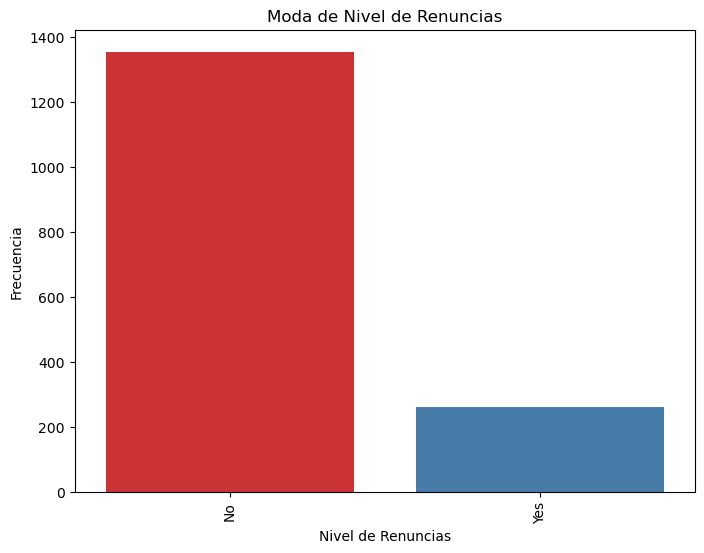

In [3]:
# Cómo estamos haciendo un estudio sobre la gente que se marcha de la empresa, queremos primero visualizar la columna de 'attrition'
# Para variables categóricas (como niveles educativos, estados, etc.) usaremos un 'countplot()'
# Este gráfico de barras mostrará la frecuencia de cada nivel educativo y resaltará cuál es el más común (la moda).

plt.figure(figsize=(8, 6))
sns.countplot(x='attrition', 
              data=datos, 
              palette='Set1')
plt.xlabel('Nivel de Renuncias')
plt.ylabel('Frecuencia')
plt.title('Moda de Nivel de Renuncias')
plt.xticks(rotation=90);

In [4]:
# Vemos que el nivel de renuncias de los encuestados es bajo pero queremos ver su %. Primero contaremos las respuestas haciendo un dataframe nuevo.
df_attrition = datos.groupby("attrition")["id_encuesta"].count().reset_index()
df_attrition

,attrition,id_encuesta
0,No,1355
1,Yes,259


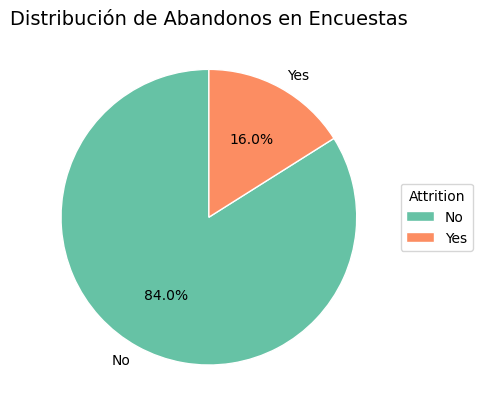

In [5]:
colores = ["#66c2a5", "#fc8d62"]

plt.pie(df_attrition["id_encuesta"],
        labels=df_attrition["attrition"],
        autopct='%1.1f%%', 
        colors=colores, 
        textprops={'fontsize': 10, 'color': 'black'}, 
        startangle=90,
        wedgeprops={'edgecolor': 'white'})  

plt.legend(df_attrition["attrition"], title="Attrition", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('Distribución de Abandonos en Encuestas', fontsize=14)
plt.show()

Podemos ver que tenemos un 16% de gente que se "fuga" en la empresa.

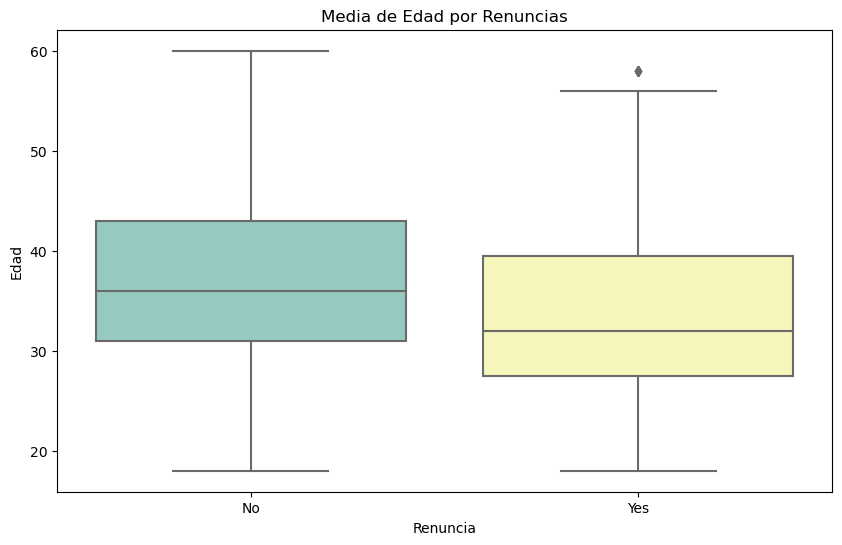

In [6]:
# Queremos ver si hay una relación con la edad con esta cantidad de renuncias. Lo veremos con un boxplot

plt.figure(figsize=(10, 6))
sns.boxplot(x='attrition', y='age', data=datos, palette='Set3')

plt.title('Media de Edad por Renuncias')
plt.xlabel('Renuncia')
plt.ylabel('Edad')
plt.show()

In [7]:
# Vamos a sacar la mediana y media de ambos datos.

datos['age'].describe()

count    1614.000000
mean       36.920694
std         9.102157
min        18.000000
25%        30.000000
50%        36.000000
75%        43.000000
max        60.000000
Name: age, dtype: float64

In [8]:
datos['attrition'].describe()

count     1614
unique       2
top         No
freq      1355
Name: attrition, dtype: object

In [9]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1614 entries, 0 to 1613
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       1614 non-null   int64  
 1   attrition                 1614 non-null   object 
 2   businesstravel            1614 non-null   object 
 3   dailyrate                 1614 non-null   float64
 4   department                1614 non-null   object 
 5   distancefromhome          1614 non-null   int64  
 6   education                 1614 non-null   int64  
 7   environmentsatisfaction   1614 non-null   int64  
 8   gender                    1614 non-null   object 
 9   hourlyrate                1614 non-null   float64
 10  jobinvolvement            1614 non-null   int64  
 11  joblevel                  1614 non-null   int64  
 12  jobrole                   1614 non-null   object 
 13  jobsatisfaction           1614 non-null   int64  
 14  maritalstatus

1. Factores Clave de Satisfacción y Retención
Objetivo: Identificar las características y factores que más influyen en la satisfacción laboral y la retención de empleados.

Acción: Usar análisis de correlación y segmentación para identificar patrones clave entre satisfacción y rotación.
Visualización:
Matrices de correlación para detectar relaciones clave.
Gráficos de barras y dispersión para observar diferencias en satisfacción y rotación según demografía.

In [10]:
numericas = datos.select_dtypes(include = np.number).columns

# usando el metodo 'combinations' vamos a generar todas las combinaciones posibles de columnas
combinaciones = list(combinations(numericas, 2))

# printeamos los resultados, una lista de tuplas
combinaciones

[('age', 'dailyrate'),
 ('age', 'distancefromhome'),
 ('age', 'education'),
 ('age', 'environmentsatisfaction'),
 ('age', 'hourlyrate'),
 ('age', 'jobinvolvement'),
 ('age', 'joblevel'),
 ('age', 'jobsatisfaction'),
 ('age', 'monthlyrate'),
 ('age', 'numcompaniesworked'),
 ('age', 'percentsalaryhike'),
 ('age', 'performancerating'),
 ('age', 'relationshipsatisfaction'),
 ('age', 'stockoptionlevel'),
 ('age', 'totalworkingyears'),
 ('age', 'trainingtimeslastyear'),
 ('age', 'worklifebalance'),
 ('age', 'yearsatcompany'),
 ('age', 'yearssincelastpromotion'),
 ('age', 'yearswithcurrmanager'),
 ('age', 'datebirth'),
 ('age', 'id_encuesta'),
 ('dailyrate', 'distancefromhome'),
 ('dailyrate', 'education'),
 ('dailyrate', 'environmentsatisfaction'),
 ('dailyrate', 'hourlyrate'),
 ('dailyrate', 'jobinvolvement'),
 ('dailyrate', 'joblevel'),
 ('dailyrate', 'jobsatisfaction'),
 ('dailyrate', 'monthlyrate'),
 ('dailyrate', 'numcompaniesworked'),
 ('dailyrate', 'percentsalaryhike'),
 ('dailyrate',

In [11]:
def identificar_linealidad (dataframe, lista_combinacion_columnas):
    """
    Identifica si las relaciones entre pares de variables en un DataFrame son lineales o no.

    Parameters:
    -----------
    dataframe : pandas.DataFrame
        El DataFrame que contiene las variables a analizar.

    lista_combinacion_columnas : list of tuples
        Una lista de tuplas donde cada tupla contiene dos nombres de columnas del DataFrame que se desea analizar.

    Returns:
    --------
    relaciones_lineales : list of tuples
        Una lista de tuplas que contienen los nombres de las columnas que tienen una relación lineal.

    relaciones_no_lineales : list of tuples
        Una lista de tuplas que contienen los nombres de las columnas que no tienen una relación lineal.

    """
    relaciones_lineales = []
    relaciones_no_lineales = []

    for tupla in lista_combinacion_columnas: 
        # Realizar la prueba de normalidad
        _, p_value1 = kstest(dataframe[tupla[0]], "norm")
        _, p_value2 = kstest(dataframe[tupla[1]], "norm")

        if p_value1 > 0.05 and p_value2 > 0.05:
            relaciones_lineales.append(tupla)
        else:
            relaciones_no_lineales.append(tupla)

    return relaciones_lineales, relaciones_no_lineales

# llamamos a la funcion

lineal, no_lineal = identificar_linealidad(datos, combinaciones)

print(f"Las variables a las que tengamos que aplicar la correlacion de pearson son: {lineal}")
print(f"Las variables a las que tengamos que aplicar la correlacion de spearman son: {no_lineal}")

Las variables a las que tengamos que aplicar la correlacion de pearson son: []
Las variables a las que tengamos que aplicar la correlacion de spearman son: [('age', 'dailyrate'), ('age', 'distancefromhome'), ('age', 'education'), ('age', 'environmentsatisfaction'), ('age', 'hourlyrate'), ('age', 'jobinvolvement'), ('age', 'joblevel'), ('age', 'jobsatisfaction'), ('age', 'monthlyrate'), ('age', 'numcompaniesworked'), ('age', 'percentsalaryhike'), ('age', 'performancerating'), ('age', 'relationshipsatisfaction'), ('age', 'stockoptionlevel'), ('age', 'totalworkingyears'), ('age', 'trainingtimeslastyear'), ('age', 'worklifebalance'), ('age', 'yearsatcompany'), ('age', 'yearssincelastpromotion'), ('age', 'yearswithcurrmanager'), ('age', 'datebirth'), ('age', 'id_encuesta'), ('dailyrate', 'distancefromhome'), ('dailyrate', 'education'), ('dailyrate', 'environmentsatisfaction'), ('dailyrate', 'hourlyrate'), ('dailyrate', 'jobinvolvement'), ('dailyrate', 'joblevel'), ('dailyrate', 'jobsatisfac

In [12]:
# como todas las parejas de variables tienen relaciones no lineales, aplicaremos la correlación de Spearman a todo el DataFrame
df_correlaciones = datos.corr(numeric_only=True, method = "spearman")
df_correlaciones

,age,dailyrate,distancefromhome,education,environmentsatisfaction,hourlyrate,jobinvolvement,joblevel,jobsatisfaction,monthlyrate,numcompaniesworked,percentsalaryhike,performancerating,relationshipsatisfaction,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearssincelastpromotion,yearswithcurrmanager,datebirth,id_encuesta
age,1.000000,-0.005461,-0.018802,0.199142,0.003127,0.024516,0.041730,0.486043,-0.010174,0.024349,0.338368,0.013307,-0.016795,0.045807,0.057739,0.500112,-0.011728,-0.010325,0.254005,0.171217,0.190263,-0.999812,-0.165317
dailyrate,-0.005461,1.000000,0.012268,-0.006519,0.003645,0.026006,0.051809,0.000332,0.040561,-0.022937,0.034043,0.023077,-0.006511,0.015156,0.031946,0.058475,-0.013655,-0.042114,-0.018611,-0.042794,-0.008766,0.004859,-0.024555
distancefromhome,-0.018802,0.012268,1.000000,0.005726,-0.008927,0.019257,0.028308,0.016072,0.007592,0.019217,0.022006,0.048240,-0.013194,0.005338,0.043674,-0.027631,-0.052078,-0.039366,-0.015424,-0.024378,-0.014242,0.018656,-0.010104
education,0.199142,-0.006519,0.005726,1.000000,-0.044318,0.007942,0.036402,0.103286,-0.001681,-0.023739,0.122867,0.008786,-0.005937,-0.019888,0.008219,0.122486,-0.035741,0.029773,0.064417,0.041675,0.050812,-0.199620,-0.019271
environmentsatisfaction,0.003127,0.003645,-0.008927,-0.044318,1.000000,-0.064093,-0.026289,0.010790,0.027780,0.042624,-0.008112,-0.034052,-0.017659,0.005035,0.004765,0.015412,-0.040696,0.055690,0.013636,0.035814,0.005280,-0.003222,-0.017625
hourlyrate,0.024516,0.026006,0.019257,0.007942,-0.064093,1.000000,0.041229,-0.031227,-0.069089,0.013251,0.032649,-0.025086,0.017889,0.008669,0.047142,-0.008634,-0.002104,-0.028434,-0.027310,-0.035268,-0.008855,-0.024084,0.033102
jobinvolvement,0.041730,0.051809,0.028308,0.036402,-0.026289,0.041229,1.000000,-0.003778,-0.010614,-0.008818,0.024892,-0.005998,0.026387,0.038432,0.048506,0.021995,0.006675,-0.021999,0.021764,-0.006973,0.050327,-0.041914,0.007590
joblevel,0.486043,0.000332,0.016072,0.103286,0.010790,-0.031227,-0.003778,1.000000,-0.012870,0.047035,0.174150,-0.037048,-0.012789,0.008850,0.050809,0.563638,-0.025442,0.023320,0.476567,0.255848,0.366739,-0.486174,-0.308251
jobsatisfaction,-0.010174,0.040561,0.007592,-0.001681,0.027780,-0.069089,-0.010614,-0.012870,1.000000,0.002086,-0.053438,0.032164,-0.016571,-0.009525,0.016304,-0.008731,-0.001101,-0.034898,0.010673,0.009088,-0.017182,0.010555,0.008733
monthlyrate,0.024349,-0.022937,0.019217,-0.023739,0.042624,0.013251,-0.008818,0.047035,0.002086,1.000000,0.029916,-0.011475,-0.026141,-0.002135,-0.022409,0.044096,-0.013342,0.007886,-0.027006,-0.017603,-0.028211,-0.024798,0.001320


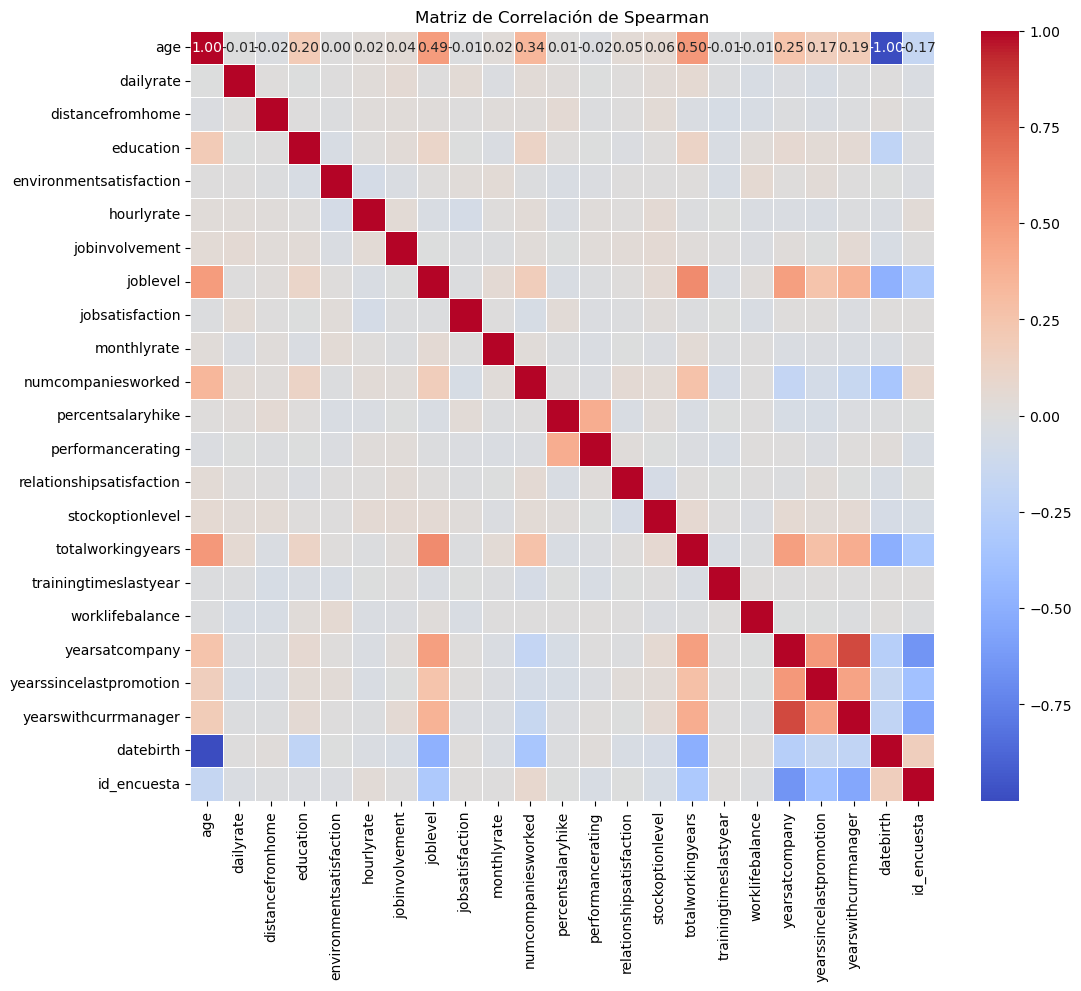

In [13]:
plt.figure(figsize=(12, 10))
sns.heatmap(df_correlaciones, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación de Spearman')
plt.show()


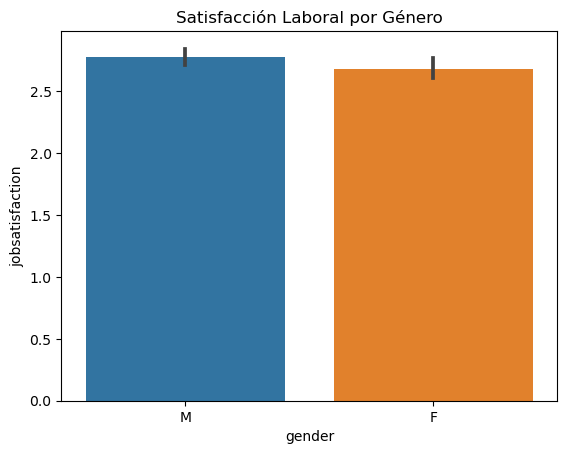

In [14]:
sns.barplot(x='gender', y='jobsatisfaction', data=datos)
plt.title('Satisfacción Laboral por Género')
plt.show()

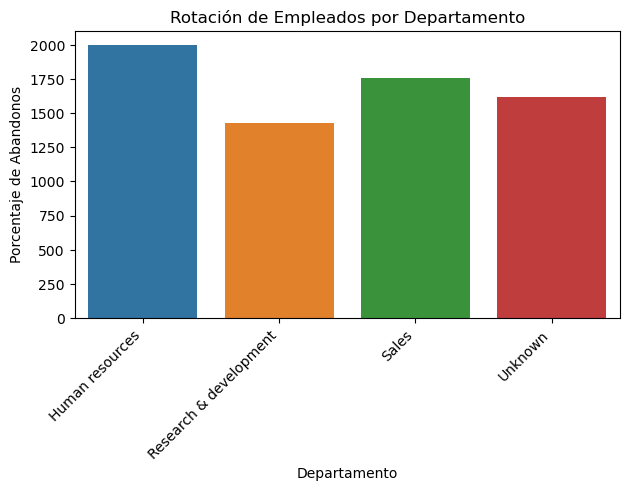

In [16]:
datos['attrition_numeric'] = datos['attrition'].map({'Yes': 1, 'No': 0})* 100 

porcentaje_abandonos = datos.groupby('department')['attrition_numeric'].mean() * 100
df_porcentaje_abandonos = porcentaje_abandonos.reset_index()

sns.barplot(x='department', y='attrition_numeric', data=df_porcentaje_abandonos)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.title('Rotación de Empleados por Departamento')
plt.xlabel('Departamento')
plt.ylabel('Porcentaje de Abandonos')
plt.show()




2. Impacto de Roles y Carga de Trabajo
Objetivo: Evaluar cómo los roles laborales, horas extra, y balance vida-trabajo afectan la rotación.

Visualización:
Gráficos de barras para comparar la rotación entre diferentes roles y niveles.
Gráficos de dispersión para analizar el impacto de horas extra y balance vida-trabajo.


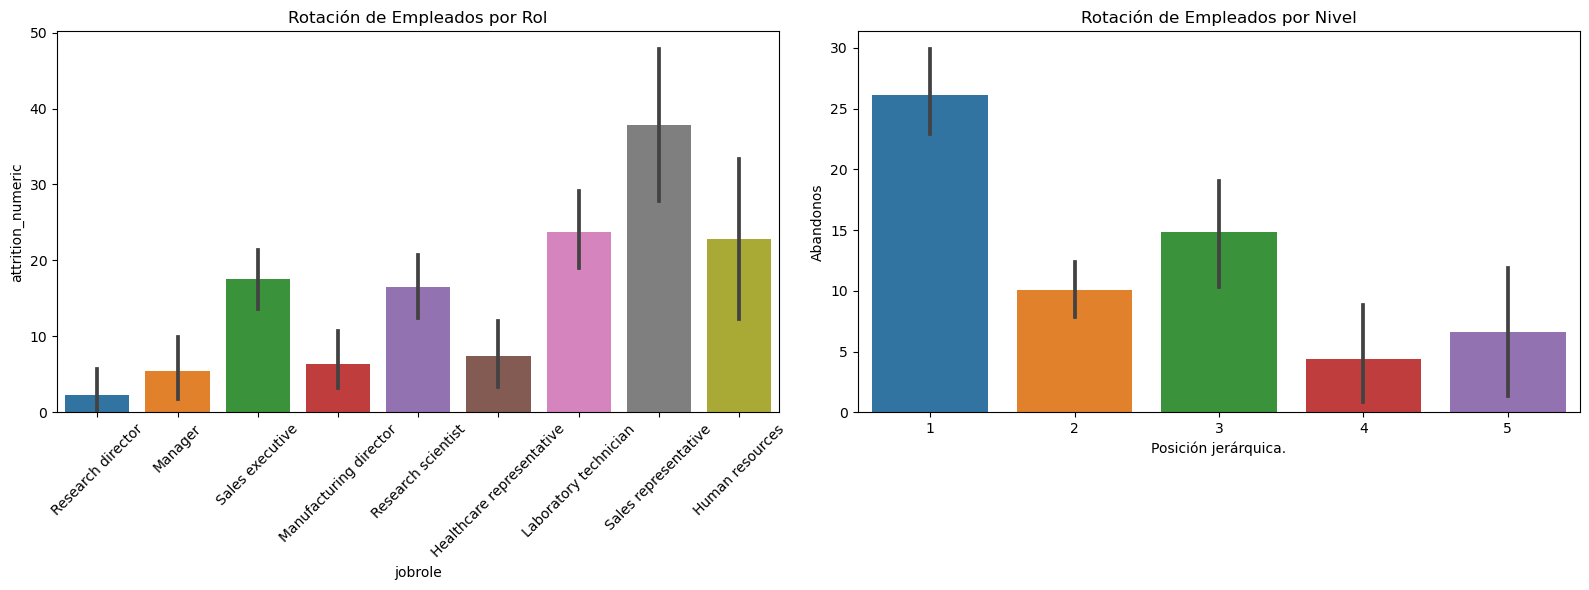

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.barplot(x='jobrole', y='attrition_numeric', data=datos, ax=axes[0])
axes[0].set_title('Rotación de Empleados por Rol')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
plt.xlabel('Departamento')
plt.ylabel('Abandonos')

sns.barplot(x='joblevel', y='attrition_numeric', data=datos, ax=axes[1])
axes[1].set_title('Rotación de Empleados por Nivel')
plt.xlabel('Posición jerárquica.')
plt.ylabel('Abandonos')

plt.tight_layout()
plt.show()

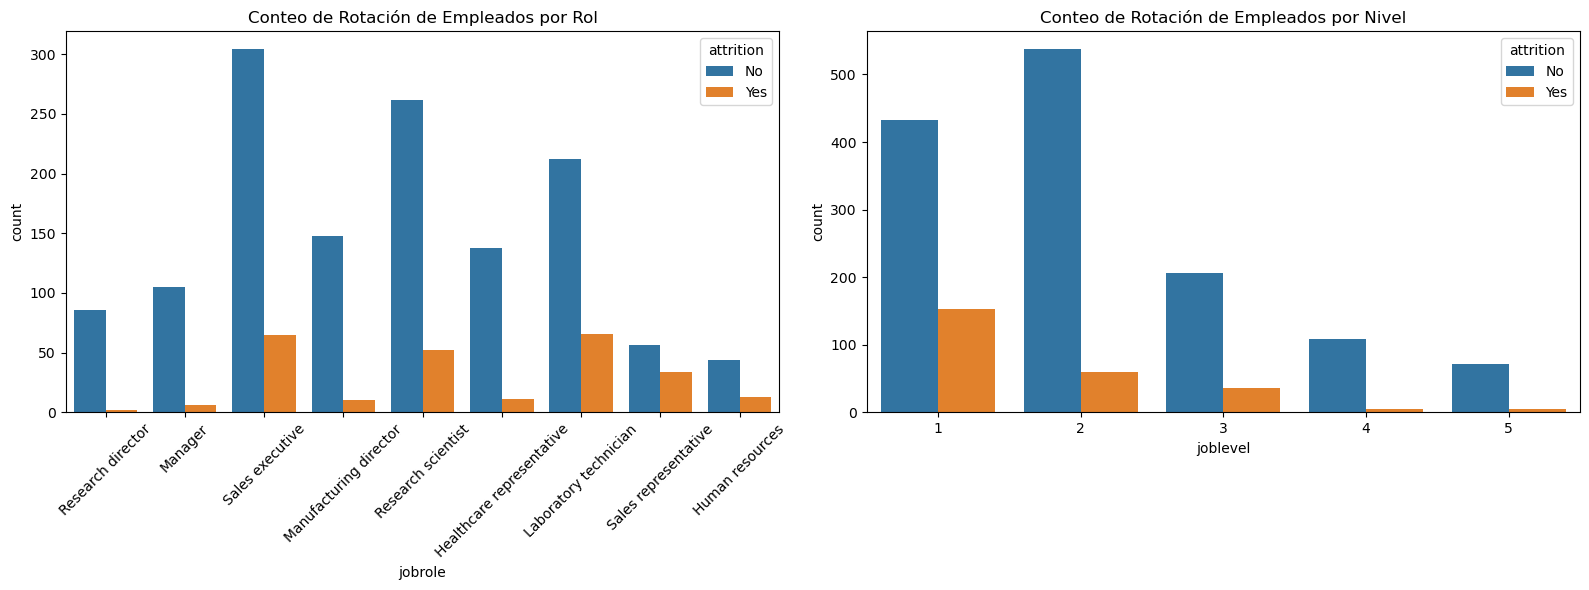

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico de conteo de rotación por Rol de trabajo
sns.countplot(x='jobrole', hue='attrition', data=datos, ax=axes[0])
axes[0].set_title('Conteo de Rotación de Empleados por Rol')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)

# Gráfico de conteo de rotación por Nivel de trabajo
sns.countplot(x='joblevel', hue='attrition', data=datos, ax=axes[1])
axes[1].set_title('Conteo de Rotación de Empleados por Nivel')

plt.tight_layout()
plt.show()

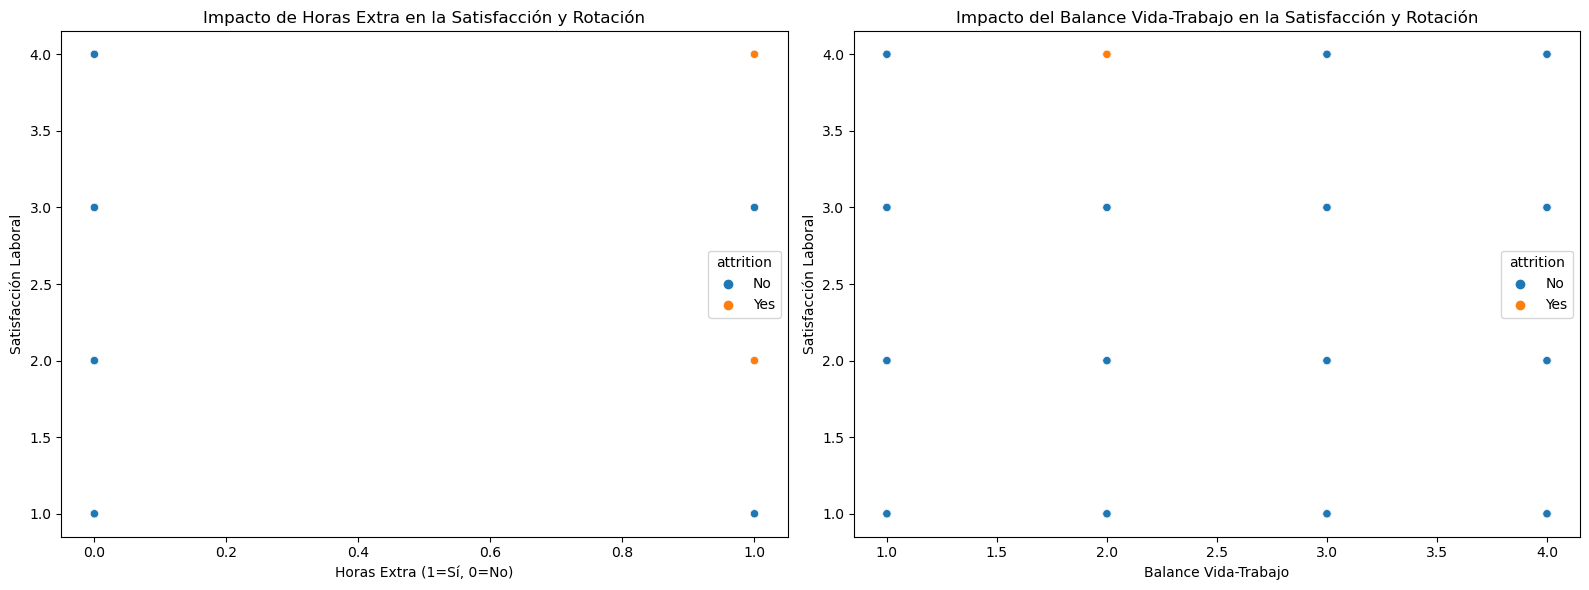

In [ ]:
datos['overtime_numeric'] = datos['overtime'].map({'Yes': 1, 'No': 0})
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.scatterplot(x='overtime_numeric', y='jobsatisfaction', hue='attrition', data=datos, ax=axes[0])
axes[0].set_title('Impacto de Horas Extra en la Satisfacción y Rotación')
axes[0].set_xlabel('Horas Extra (1=Sí, 0=No)')
axes[0].set_ylabel('Satisfacción Laboral')

sns.scatterplot(x='worklifebalance', y='jobsatisfaction', hue='attrition', data=datos, ax=axes[1])
axes[1].set_title('Impacto del Balance Vida-Trabajo en la Satisfacción y Rotación')
axes[1].set_xlabel('Balance Vida-Trabajo')
axes[1].set_ylabel('Satisfacción Laboral')

plt.tight_layout()
plt.show()

3. Relación entre Compensación y Satisfacción
Objetivo: Determinar si los niveles salariales y beneficios influyen en la satisfacción y retención.
Visualización:
Gráficos de dispersión y barras para observar la relación entre salario y satisfacción/rotación.


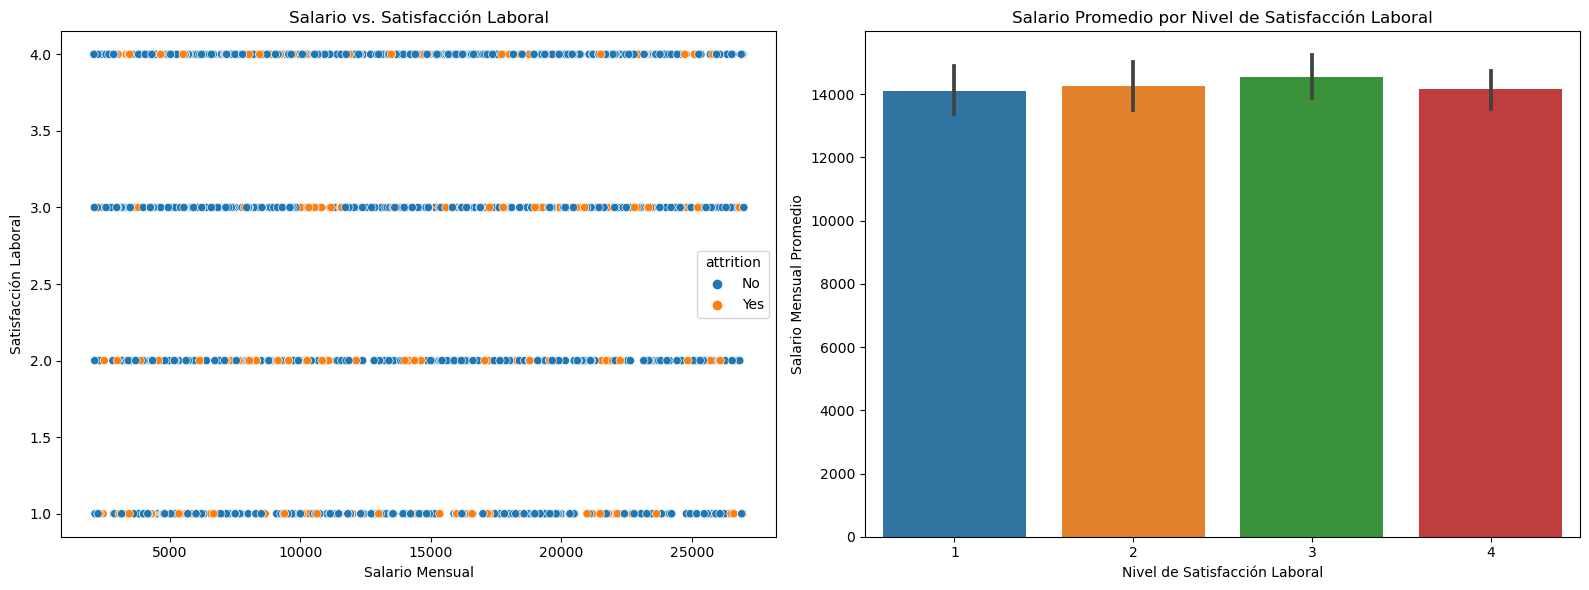

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.scatterplot(x='monthlyrate', y='jobsatisfaction', hue='attrition', data=datos, ax=axes[0])
axes[0].set_title('Salario vs. Satisfacción Laboral')
axes[0].set_xlabel('Salario Mensual')
axes[0].set_ylabel('Satisfacción Laboral')

sns.barplot(x='jobsatisfaction', y='monthlyrate', data=datos, ax=axes[1])
axes[1].set_title('Salario Promedio por Nivel de Satisfacción Laboral')
axes[1].set_xlabel('Nivel de Satisfacción Laboral')
axes[1].set_ylabel('Salario Mensual Promedio')

plt.tight_layout()
plt.show()

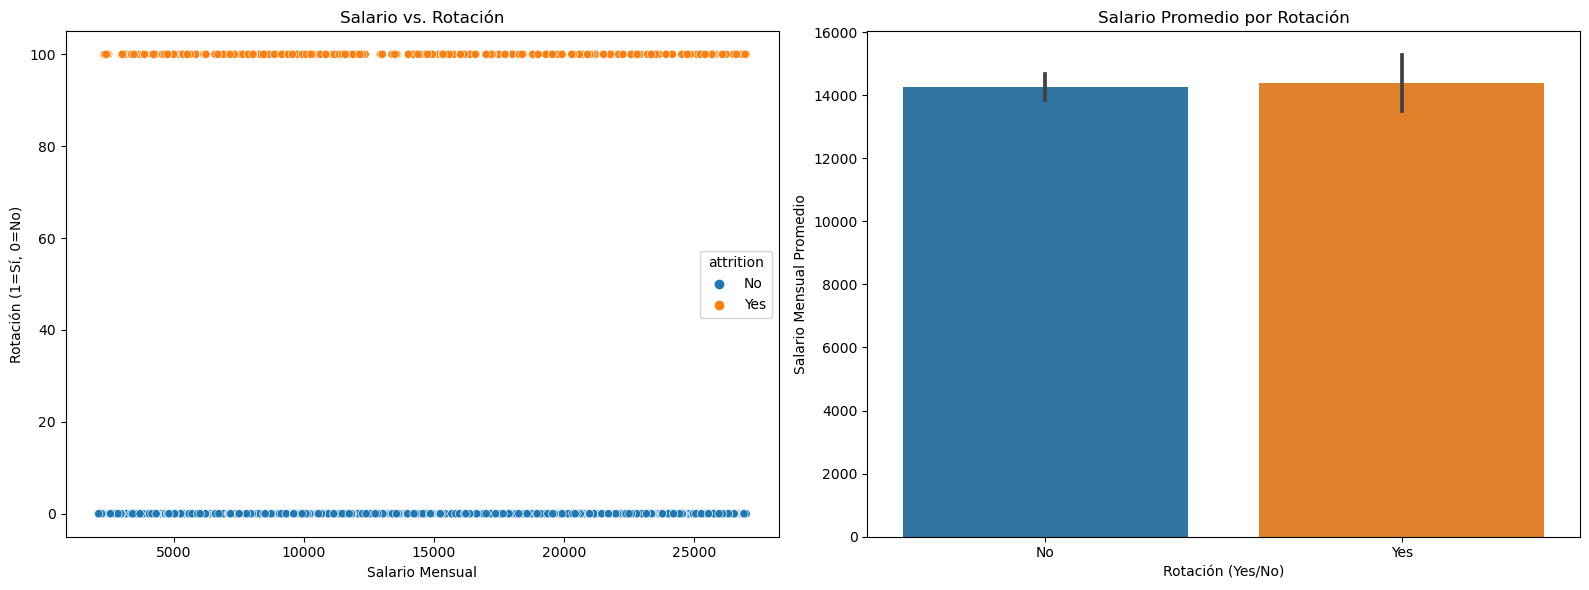

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.scatterplot(x='monthlyrate', y='attrition_numeric', hue='attrition', data=datos, ax=axes[0])
axes[0].set_title('Salario vs. Rotación')
axes[0].set_xlabel('Salario Mensual')
axes[0].set_ylabel('Rotación (1=Sí, 0=No)')

sns.barplot(x='attrition', y='monthlyrate', data=datos, ax=axes[1])
axes[1].set_title('Salario Promedio por Rotación')
axes[1].set_xlabel('Rotación (Yes/No)')
axes[1].set_ylabel('Salario Mensual Promedio')

plt.tight_layout()
plt.show()

4. Evaluación del Desarrollo Profesional
Objetivo: Explorar cómo la capacitación y la experiencia afectan la satisfacción y retención.
Visualización:
Gráficos de barras y líneas para mostrar cómo cambian la satisfacción y rotación con el tiempo en la empresa.

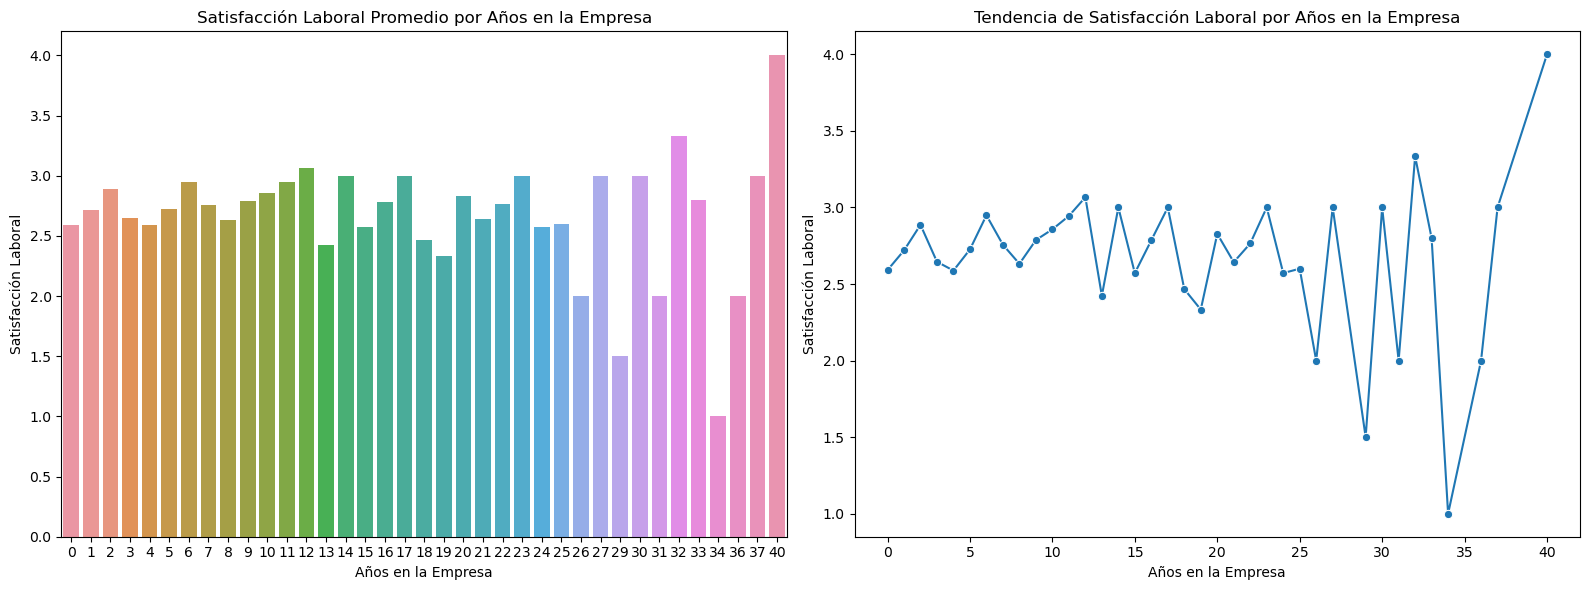

In [ ]:
data_grouped = datos.groupby('yearsatcompany').agg({
    'jobsatisfaction': 'mean',
    'attrition_numeric': 'mean'
}).reset_index()

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.barplot(x='yearsatcompany', y='jobsatisfaction', data=data_grouped, ax=axes[0])
axes[0].set_title('Satisfacción Laboral Promedio por Años en la Empresa')
axes[0].set_xlabel('Años en la Empresa')
axes[0].set_ylabel('Satisfacción Laboral')

sns.lineplot(x='yearsatcompany', y='jobsatisfaction', data=data_grouped, marker='o', ax=axes[1])
axes[1].set_title('Tendencia de Satisfacción Laboral por Años en la Empresa')
axes[1].set_xlabel('Años en la Empresa')
axes[1].set_ylabel('Satisfacción Laboral')

plt.tight_layout()
plt.show()

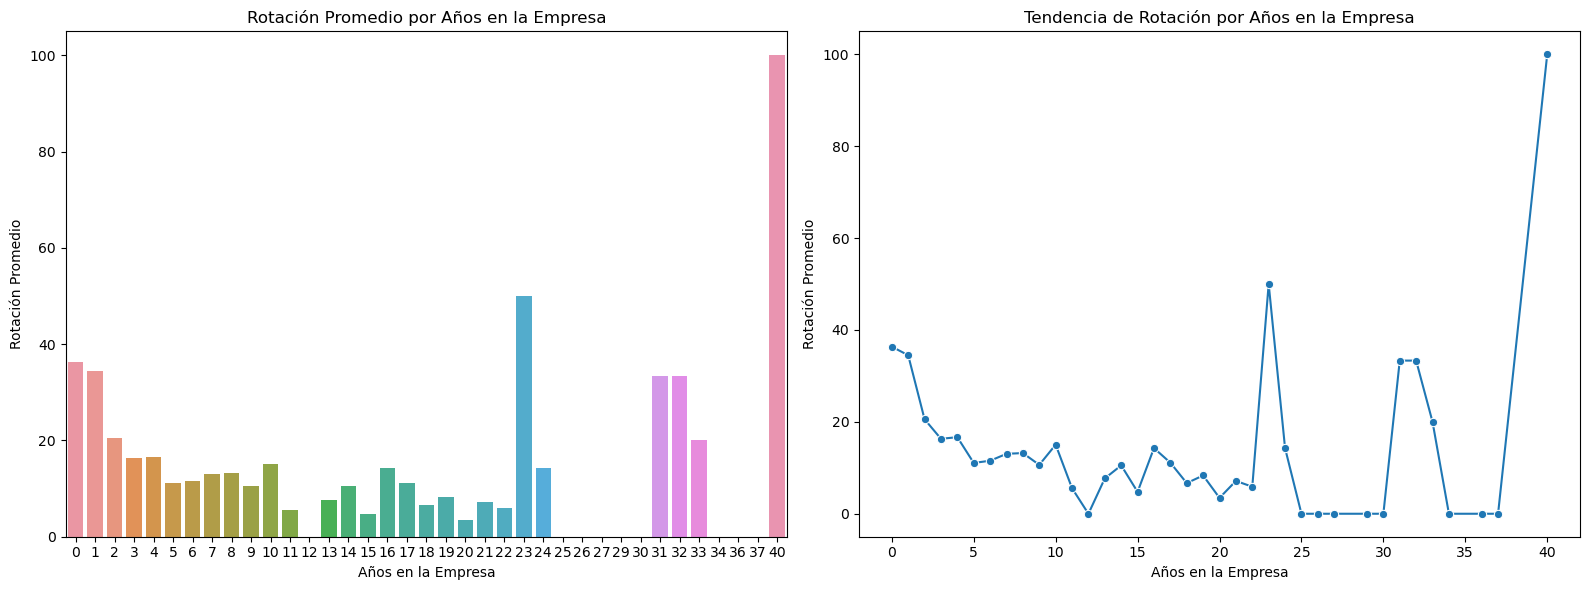

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.barplot(x='yearsatcompany', y='attrition_numeric', data=data_grouped, ax=axes[0])
axes[0].set_title('Rotación Promedio por Años en la Empresa')
axes[0].set_xlabel('Años en la Empresa')
axes[0].set_ylabel('Rotación Promedio')

sns.lineplot(x='yearsatcompany', y='attrition_numeric', data=data_grouped, marker='o', ax=axes[1])
axes[1].set_title('Tendencia de Rotación por Años en la Empresa')
axes[1].set_xlabel('Años en la Empresa')
axes[1].set_ylabel('Rotación Promedio')


plt.tight_layout()
plt.show()

5. Impacto del Ambiente Laboral y Balance Vida-Trabajo
Objetivo: Examinar la influencia del ambiente laboral y el balance vida-trabajo en la retención.
Visualización:
Matrices de correlación y gráficos de violín/boxplots para observar la relación entre estos factores y la rotación.

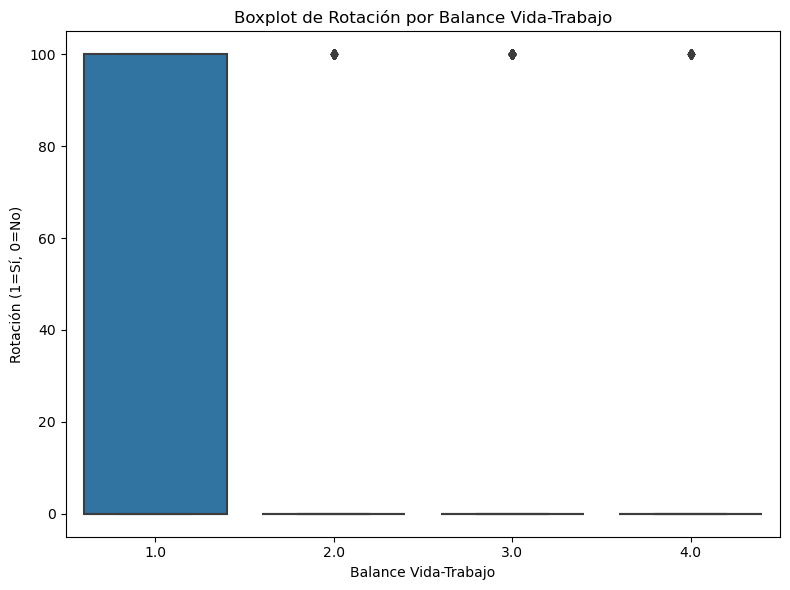

In [ ]:
fig, axes = plt.subplots(1, 1, figsize=(8, 6))
sns.boxplot(x='worklifebalance', y='attrition_numeric', data=datos, ax=axes)
axes.set_title('Boxplot de Rotación por Balance Vida-Trabajo')
axes.set_xlabel('Balance Vida-Trabajo')
axes.set_ylabel('Rotación (1=Sí, 0=No)')

plt.tight_layout()
plt.show()

6. Impacto de la Demografía
Objetivo: Entender cómo las características demográficas afectan la satisfacción y la rotación.
Visualización:
Gráficos comparativos y segmentación para entender las diferencias demográficas.

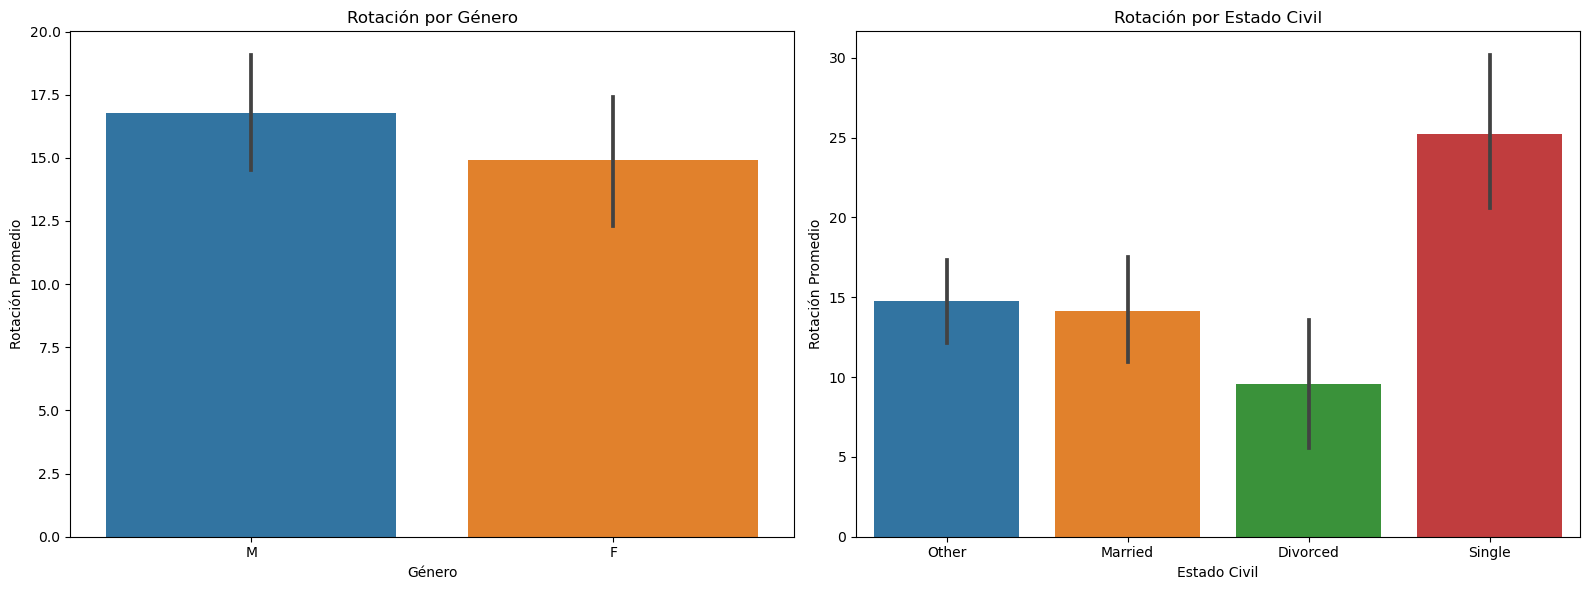

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.barplot(x='gender', y='attrition_numeric', data=datos, ax=axes[0])
axes[0].set_title('Rotación por Género')
axes[0].set_xlabel('Género')
axes[0].set_ylabel('Rotación Promedio')

sns.barplot(x='maritalstatus', y='attrition_numeric', data=datos, ax=axes[1])
axes[1].set_title('Rotación por Estado Civil')
axes[1].set_xlabel('Estado Civil')
axes[1].set_ylabel('Rotación Promedio')

plt.tight_layout()
plt.show()

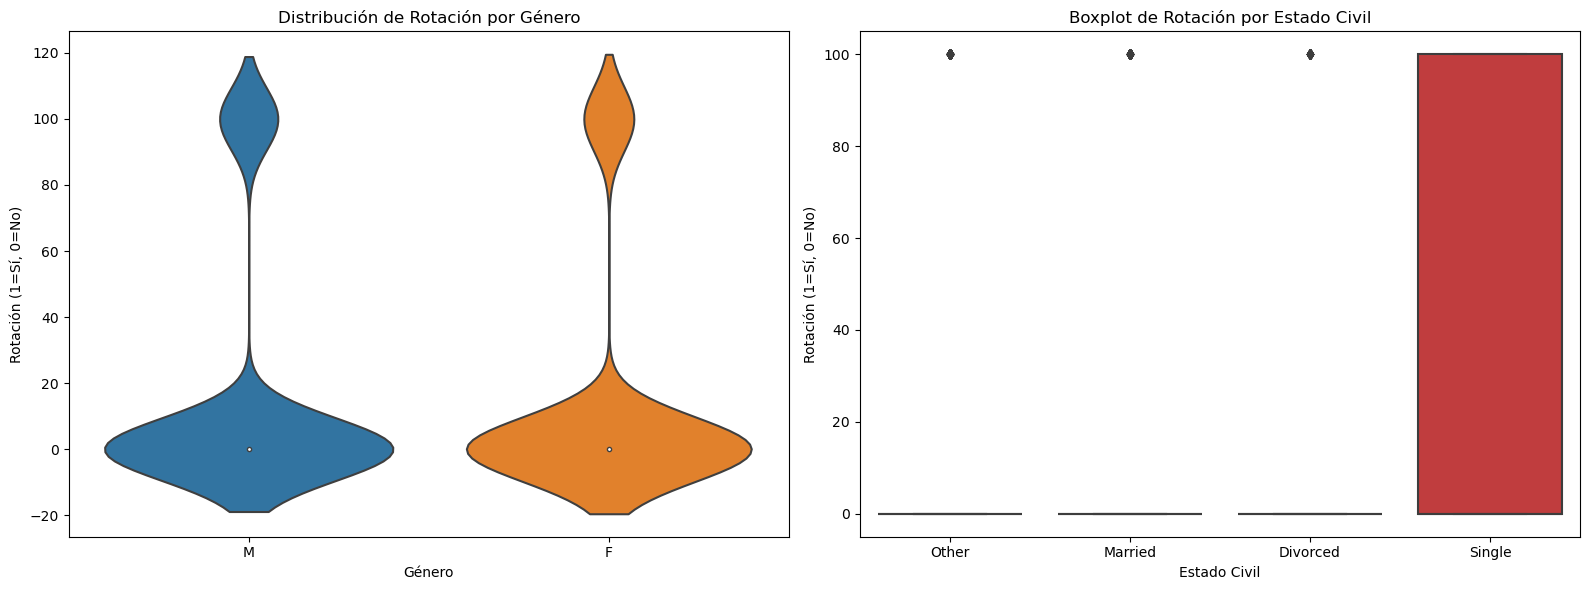

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.violinplot(x='gender', y='attrition_numeric', data=datos, ax=axes[0])
axes[0].set_title('Distribución de Rotación por Género')
axes[0].set_xlabel('Género')
axes[0].set_ylabel('Rotación (1=Sí, 0=No)')

sns.boxplot(x='maritalstatus', y='attrition_numeric', data=datos, ax=axes[1])
axes[1].set_title('Boxplot de Rotación por Estado Civil')
axes[1].set_xlabel('Estado Civil')
axes[1].set_ylabel('Rotación (1=Sí, 0=No)')

plt.tight_layout()
plt.show()

8. Conclusiones y Recomendaciones
Objetivo: Formular acciones específicas para mejorar la satisfacción y reducir la rotación.
Visualización:
Dashboards o informes que resuman las conclusiones clave y las recomendaciones estratégicas.

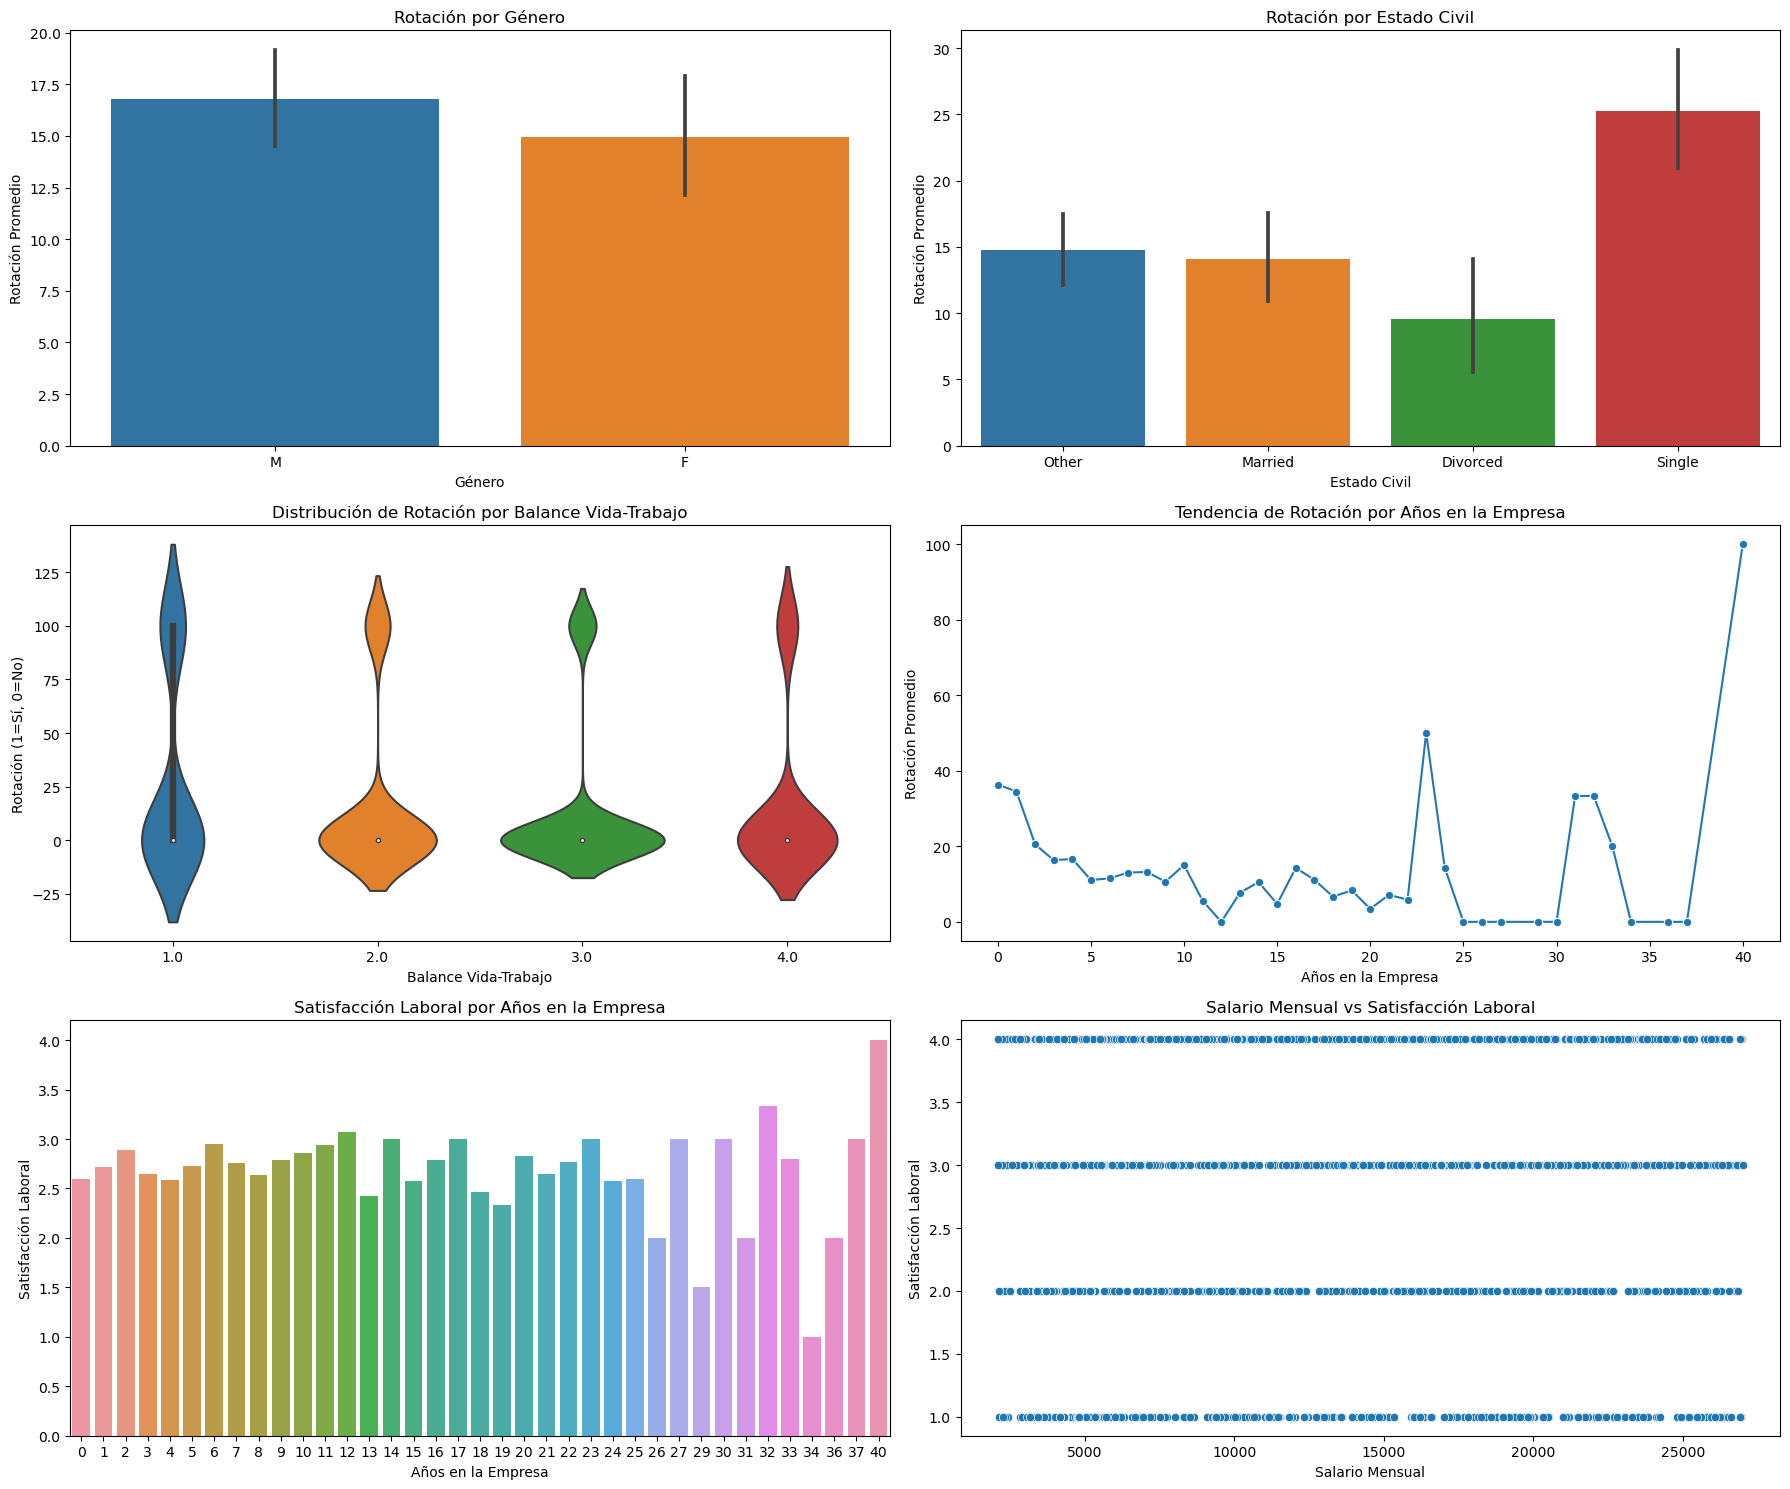

In [ ]:
fig, axes = plt.subplots(3, 2, figsize=(18, 15))

sns.barplot(x='gender', y='attrition_numeric', data=datos, ax=axes[0, 0])
axes[0, 0].set_title('Rotación por Género')
axes[0, 0].set_xlabel('Género')
axes[0, 0].set_ylabel('Rotación Promedio')

sns.barplot(x='maritalstatus', y='attrition_numeric', data=datos, ax=axes[0, 1])
axes[0, 1].set_title('Rotación por Estado Civil')
axes[0, 1].set_xlabel('Estado Civil')
axes[0, 1].set_ylabel('Rotación Promedio')

sns.violinplot(x='worklifebalance', y='attrition_numeric', data=datos, ax=axes[1, 0])
axes[1, 0].set_title('Distribución de Rotación por Balance Vida-Trabajo')
axes[1, 0].set_xlabel('Balance Vida-Trabajo')
axes[1, 0].set_ylabel('Rotación (1=Sí, 0=No)')

data_grouped = datos.groupby('yearsatcompany').agg({
    'jobsatisfaction': 'mean',
    'attrition_numeric': 'mean'
}).reset_index()
sns.lineplot(x='yearsatcompany', y='attrition_numeric', data=data_grouped, marker='o', ax=axes[1, 1])
axes[1, 1].set_title('Tendencia de Rotación por Años en la Empresa')
axes[1, 1].set_xlabel('Años en la Empresa')
axes[1, 1].set_ylabel('Rotación Promedio')

sns.barplot(x='yearsatcompany', y='jobsatisfaction', data=data_grouped, ax=axes[2, 0])
axes[2, 0].set_title('Satisfacción Laboral por Años en la Empresa')
axes[2, 0].set_xlabel('Años en la Empresa')
axes[2, 0].set_ylabel('Satisfacción Laboral')

sns.scatterplot(x='monthlyrate', y='jobsatisfaction', data=datos, ax=axes[2, 1])
axes[2, 1].set_title('Salario Mensual vs Satisfacción Laboral')
axes[2, 1].set_xlabel('Salario Mensual')
axes[2, 1].set_ylabel('Satisfacción Laboral')

plt.tight_layout()
plt.show()